In [48]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings

**Base de dados**

In [49]:
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span style="font-size: 14px;">

- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [51]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [52]:
df.shape

(2340, 4)

In [53]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [54]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2340.000000,2340.000000,2340.000000,2.340000e+03
mean,6.335303,8.164996,17.729274,5.339491e+05
std,0.493287,5.993575,1.726801,1.493607e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.009000,3.740000,16.600000,4.326000e+05
50%,6.335000,5.250000,16.600000,5.250000e+05
75%,6.635000,11.280000,19.200000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [55]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["firebrick"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [56]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [57]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["orange"])
boxplot.show()

**Valor médio das casas**

In [58]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["crimson"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

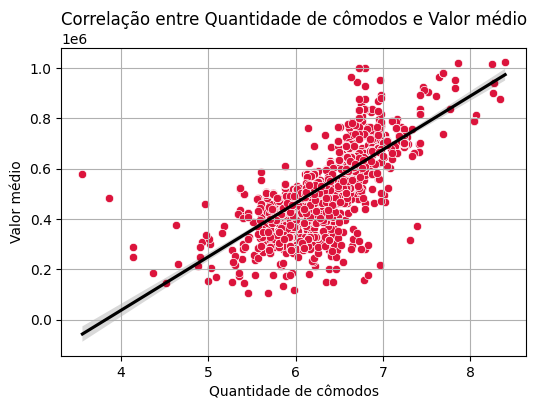

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='crimson')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='black')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

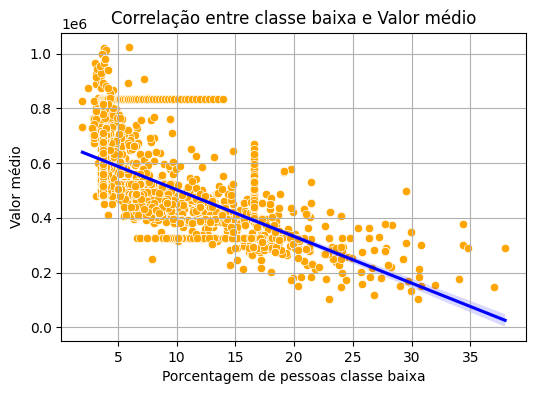

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='orange')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

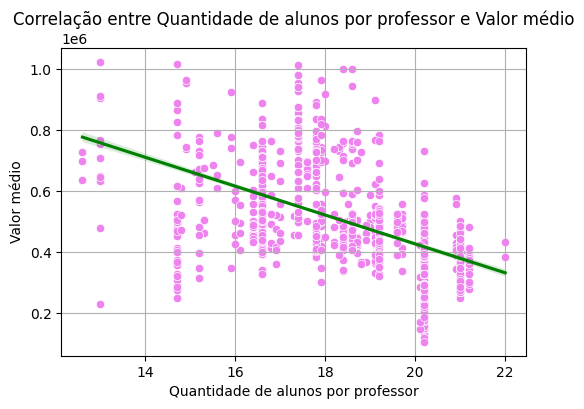

In [61]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='violet')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

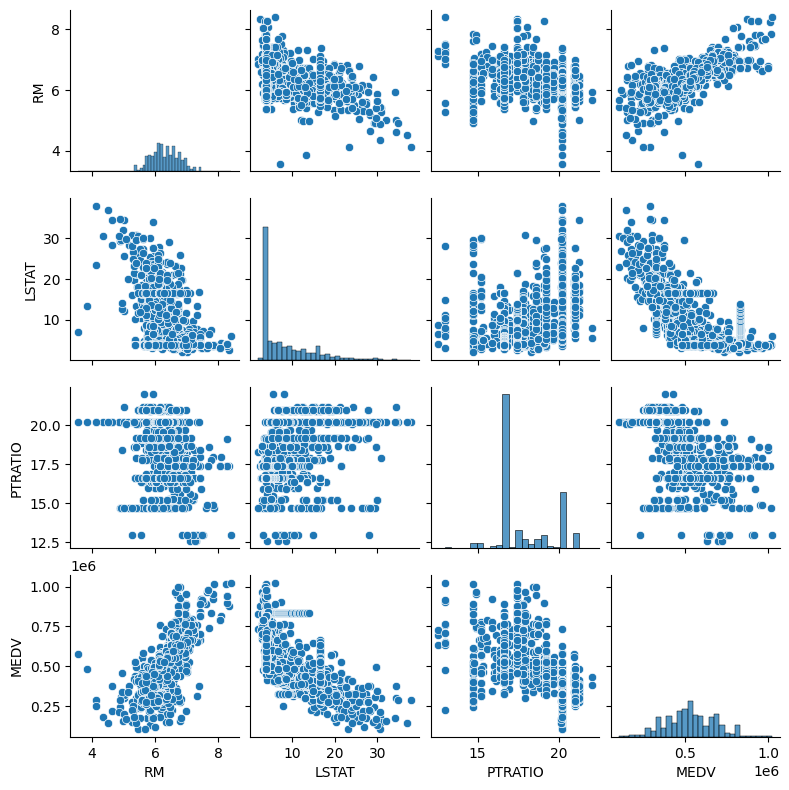

In [62]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

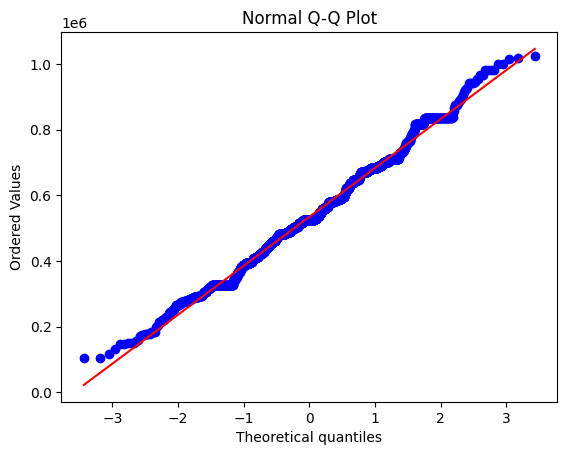

In [63]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [64]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

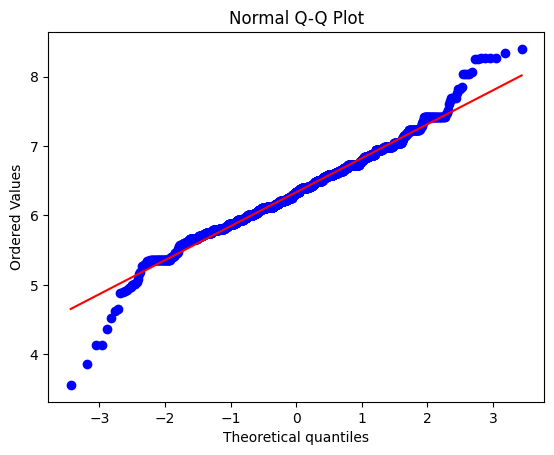

In [65]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [66]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

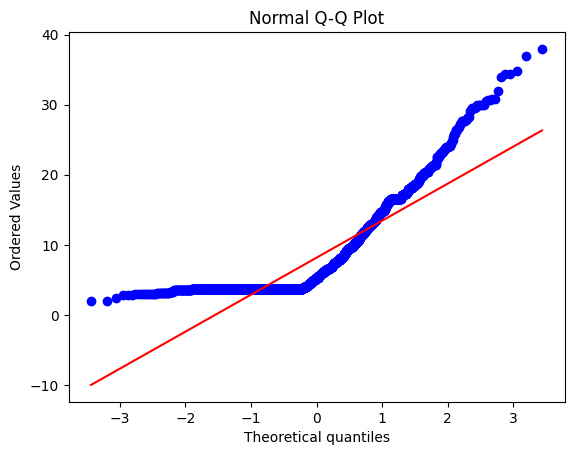

In [67]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [68]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

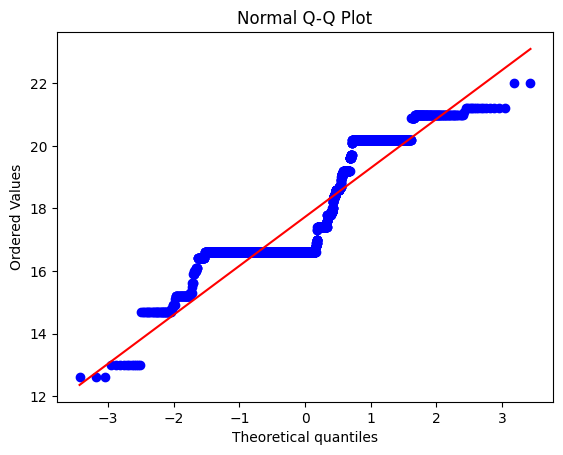

In [69]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [70]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [71]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9928
p-valor: 2.4282e-09


In [72]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0585
p-valor: 1.0000e-03


**RM**

In [73]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9827
p-valor: 3.0274e-16


In [74]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0425
p-valor: 1.0000e-03


**LSTAT**

In [75]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7768
p-valor: 8.2119e-49


In [76]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2039
p-valor: 1.0000e-03


**PTRATIO**

In [77]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8185
p-valor: 1.7000e-45


In [78]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3071
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [79]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.70
p-valor: 0.00e+00


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [80]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [81]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 0.00e+00


In [82]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.347137,-0.155367,0.731275
LSTAT,-0.347137,1.000000,0.550828,-0.698332
PTRATIO,-0.155367,0.550828,1.000000,-0.489611
MEDV,0.731275,-0.698332,-0.489611,1.000000


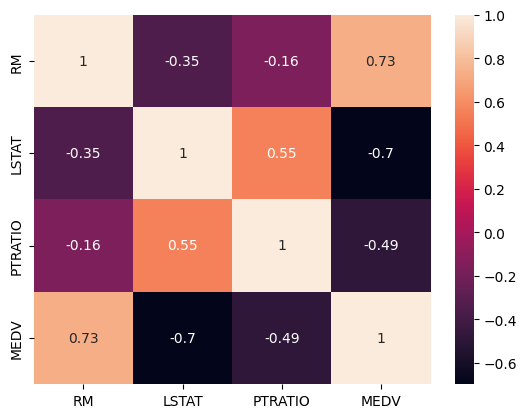

In [83]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Regressão Polinomial #

<span style="font-size: 13px;">

**O que é Regressão Polinomial?**

A regressão polinomial é uma extensão da regressão linear, onde a relação entre a variável independente (X) e a variável dependente (Y) é modelada como um polinômio de grau n.

**A equação geral da regressão polinomial é dada por:**

$ Y = β0 + β1*X + β2*X^2 + ... + βn*X^n + ε $

Cada termo do polinômio $(X^k)$ representa uma potência de X elevada a um determinado grau $k$.

Onde:
- $Y$ é a variável dependente
- $X$ é a variável independente
- $β0, β1,$ ..., $βn$ são os coeficientes do polinômio
- $ε$ é o erro aleatório

**Parâmetros da Regressão Polinomial**

Os principais parâmetros da regressão polinomial são:
- Grau do Polinômio (n): Determina o grau do polinômio a ser ajustado aos dados. Um maior grau pode levar a um ajuste mais flexível, mas também aumenta o risco </br> de overfitting.
 O grau do polinômio (n) determina a complexidade do modelo. Um grau maior permite ao modelo capturar relações mais complexas nos dados, </br> mas também aumenta o risco de overfitting, onde o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados.
- Regularização: Alguns modelos de regressão polinomial podem incluir termos de regularização para evitar overfitting.

**Para implementar a regressão polinomial em Python, podemos usar bibliotecas como NumPy e scikit-learn. O processo geral envolve:**
1. Preparar os dados
2. Transformar os recursos para incluir termos polinomiais
3. Ajustar o modelo de regressão linear aos dados transformados
4. Avaliar o desempenho do modelo

</span>

## Separação de variáveis ##

In [84]:
x1 = df.iloc[:, 0:1].values

In [85]:
y = df.iloc[:, 3].values

### Separação em treino e teste ###

In [86]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y, test_size = 0.3, random_state = 5
)

In [94]:
x_train.shape, y_train.shape

((1638, 1), (1638,))

In [95]:
x_test.shape, y_test.shape

((702, 1), (702,))

### Pré-processamento ###

In [87]:
grau_poly = PolynomialFeatures(degree = 2)

**Ajuste para polinomial**

In [88]:
x_poly = grau_poly.fit_transform(x_train)
x_poly

array([[ 1.      ,  6.525   , 42.575625],
       [ 1.      ,  5.936   , 35.236096],
       [ 1.      ,  6.377   , 40.666129],
       ...,
       [ 1.      ,  5.362   , 28.751044],
       [ 1.      ,  6.982   , 48.748324],
       [ 1.      ,  6.511   , 42.393121]])

In [89]:
polynomial = LinearRegression()

**Treinamento**

In [90]:
polynomial.fit(x_poly, y_train);

In [91]:
previsoes_train = polynomial.predict(x_poly)

In [92]:
polynomial.coef_

array([      0.        , -368149.65457792,   45764.86999412])

In [93]:
polynomial.intercept_

1018214.1924397952

**Equação gerada:**

<span style="font-size: 14px;">

$ \text{Valor} = (1018214.19) - (368149.65 \times RM) + (45764.86 \times RM^2) $

</span>

### Gráfico ###

In [96]:
numeros = np.linspace(3, 9.84, 1638)

In [97]:
valor = 1018214.19 - 368149.65 * numeros + 45764.86*numeros**2